In [1]:
import pandas as pd

ruta = "C:/Users/danie/Documents/ESPECIALIZACION-ANALITICA/03_Analisis Geoespacial/biovars_espeletia_total.csv"
bio = pd.read_csv(ruta, sep=",", encoding="utf-8")

In [2]:
bio = bio.drop(columns=['system:index'])
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41696 entries, 0 to 41695
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bio01          41696 non-null  float64
 1   bio02          41696 non-null  float64
 2   bio03          41696 non-null  float64
 3   bio04          41696 non-null  float64
 4   bio05          41696 non-null  float64
 5   bio06          41696 non-null  float64
 6   bio07          41696 non-null  float64
 7   bio08          41696 non-null  float64
 8   bio09          41696 non-null  float64
 9   bio10          41696 non-null  float64
 10  bio11          41696 non-null  float64
 11  bio12          41696 non-null  float64
 12  bio13          41696 non-null  float64
 13  bio14          41696 non-null  float64
 14  bio15          41696 non-null  float64
 15  bio16          41696 non-null  float64
 16  bio17          41696 non-null  float64
 17  bio18          41696 non-null  float64
 18  bio19 

In [3]:
bio.columns

Index(['bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08',
       'bio09', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16',
       'bio17', 'bio18', 'bio19', 'countryCode', 'elevation_DEM', 'eventDate',
       'genus', 'geo', 'latitude', 'locality', 'longitude', 'species',
       'stateProvince', 'y', '.geo'],
      dtype='object')

In [4]:
# Codificar la columna 'species' como tipo cadena
bio['species'] = bio['species'].astype(str)

In [5]:
# Necesitamos filtrar solo las especies mas dominantes
# Leer el archivo .txt
with open('../data/primeras_especies.txt', 'r') as file:
    especies = file.read().splitlines()

print(especies)

['Espeletia grandiflora', 'Espeletia pycnophylla', 'Espeletia hartwegiana', 'Espeletia cleefii', 'Espeletia curialensis', 'nan', 'Espeletia corymbosa', 'Espeletia argentea', 'Espeletia boyacensis', 'Espeletia frontinoensis', 'Espeletia glandulosa', 'Espeletia praefrontina', 'Espeletia killipii', 'Espeletia murilloi', 'Espeletia brachyaxiantha', 'Espeletia uribei', 'Espeletia schultzii', 'Espeletia barclayana', 'Espeletia timotensis', 'Espeletia congestiflora', 'Espeletia petiolata', 'Espeletia tunjana', 'Espeletia lopezii', 'Espeletia muiska', 'Espeletia santanderensis', 'Espeletia moritziana']


In [6]:
print(type(especies))
especies

<class 'list'>


['Espeletia grandiflora',
 'Espeletia pycnophylla',
 'Espeletia hartwegiana',
 'Espeletia cleefii',
 'Espeletia curialensis',
 'nan',
 'Espeletia corymbosa',
 'Espeletia argentea',
 'Espeletia boyacensis',
 'Espeletia frontinoensis',
 'Espeletia glandulosa',
 'Espeletia praefrontina',
 'Espeletia killipii',
 'Espeletia murilloi',
 'Espeletia brachyaxiantha',
 'Espeletia uribei',
 'Espeletia schultzii',
 'Espeletia barclayana',
 'Espeletia timotensis',
 'Espeletia congestiflora',
 'Espeletia petiolata',
 'Espeletia tunjana',
 'Espeletia lopezii',
 'Espeletia muiska',
 'Espeletia santanderensis',
 'Espeletia moritziana']

In [7]:
# Filtrar el DataFrame bio para que solo contenga las especies de la lista 'especies'
bio_filt = bio[bio['species'].isin(especies)]

# Mostrar el DataFrame filtrado
bio_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39538 entries, 3 to 41695
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bio01          39538 non-null  float64
 1   bio02          39538 non-null  float64
 2   bio03          39538 non-null  float64
 3   bio04          39538 non-null  float64
 4   bio05          39538 non-null  float64
 5   bio06          39538 non-null  float64
 6   bio07          39538 non-null  float64
 7   bio08          39538 non-null  float64
 8   bio09          39538 non-null  float64
 9   bio10          39538 non-null  float64
 10  bio11          39538 non-null  float64
 11  bio12          39538 non-null  float64
 12  bio13          39538 non-null  float64
 13  bio14          39538 non-null  float64
 14  bio15          39538 non-null  float64
 15  bio16          39538 non-null  float64
 16  bio17          39538 non-null  float64
 17  bio18          39538 non-null  float64
 18  bio19      

In [8]:
print(bio_filt.isna().sum())

bio01                0
bio02                0
bio03                0
bio04                0
bio05                0
bio06                0
bio07                0
bio08                0
bio09                0
bio10                0
bio11                0
bio12                0
bio13                0
bio14                0
bio15                0
bio16                0
bio17                0
bio18                0
bio19                0
countryCode      19387
elevation_DEM    19387
eventDate        19522
genus            19387
geo              19387
latitude             0
locality         21025
longitude            0
species              0
stateProvince    20275
y                    0
.geo                 0
dtype: int64


## Bioclimatic variables

Bioclimatic variables are derived from the monthly temperature and rainfall values in order to generate more biologically meaningful variables. These are often used in species distribution modeling and related ecological modeling techniques. The bioclimatic variables represent annual trends (e.g., mean annual temperature, annual precipitation) seasonality (e.g., annual range in temperature and precipitation) and extreme or limiting environmental factors (e.g., temperature of the coldest and warmest month, and precipitation of the wet and dry quarters). A quarter is a period of three months (1/4 of the year).

### They are coded as follows:

BIO1 = Annual Mean Temperature

BIO2 = Mean Diurnal Range (Mean of monthly (max temp - min temp))

BIO3 = Isothermality (BIO2/BIO7) (×100)

BIO4 = Temperature Seasonality (standard deviation ×100)

BIO5 = Max Temperature of Warmest Month

BIO6 = Min Temperature of Coldest Month

BIO7 = Temperature Annual Range (BIO5-BIO6)

BIO8 = Mean Temperature of Wettest Quarter

BIO9 = Mean Temperature of Driest Quarter

BIO10 = Mean Temperature of Warmest Quarter

BIO11 = Mean Temperature of Coldest Quarter

BIO12 = Annual Precipitation

BIO13 = Precipitation of Wettest Month

BIO14 = Precipitation of Driest Month

BIO15 = Precipitation Seasonality (Coefficient of Variation)

BIO16 = Precipitation of Wettest Quarter

BIO17 = Precipitation of Driest Quarter

BIO18 = Precipitation of Warmest Quarter

BIO19 = Precipitation of Coldest Quarter

Sin embargo, las unidades de estas biovariables pueden ser confusas. Para ellos la siguiente tabla:

| Código | Variable                                    | Unidad     | Notas clave                                    |
| ------ | ------------------------------------------- | ---------- | ---------------------------------------------- |
| bio1   | Temperatura media anual                     | **°C ×10** | Divide entre 10 para obtener °C reales         |
| bio2   | Rango diurno medio (temp. max - min diaria) | **°C ×10** |                                                |
| bio3   | Isotermalidad (bio2 / bio7) × 100           | **%**      |                                                |
| bio4   | Rango de temperatura anual (bio5 - bio6)    | **°C ×10** |                                                |
| bio5   | Temp. máxima del mes más cálido             | **°C ×10** |                                                |
| bio6   | Temp. mínima del mes más frío               | **°C ×10** |                                                |
| bio7   | Amplitud térmica anual (bio5 - bio6)        | **°C ×10** |                                                |
| bio8   | Temp. media del trimestre más húmedo        | **°C ×10** |                                                |
| bio9   | Temp. media del trimestre más seco          | **°C ×10** |                                                |
| bio10  | Temp. media del trimestre más cálido        | **°C ×10** |                                                |
| bio11  | Temp. media del trimestre más frío          | **°C ×10** |                                                |
| bio12  | Precipitación anual                         | **mm**     |                                                |
| bio13  | Precipitación del mes más húmedo            | **mm**     |                                                |
| bio14  | Precipitación del mes más seco              | **mm**     |                                                |
| bio15  | Estacionalidad de la precipitación (CV)     | **%**      | Es el coeficiente de variación (SD/mean × 100) |
| bio16  | Prec. del trimestre más húmedo              | **mm**     |                                                |
| bio17  | Prec. del trimestre más seco                | **mm**     |                                                |
| bio18  | Prec. del trimestre más cálido              | **mm**     |                                                |
| bio19  | Prec. del trimestre más frío                | **mm**     |                                                |


In [9]:
# Convertir las temperaturas a Centigrados, dividiendo entre 10
temp = ['bio01','bio02','bio04','bio05','bio06','bio07','bio08','bio09','bio10','bio11']
# Mejor creamos un nuevo DataFrame para no modificar el original
biomodel = bio_filt.copy()
biomodel[temp] = bio_filt[temp] / 10.0


## Histogramas individuales

In [10]:
biomodel.columns[:19]

Index(['bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08',
       'bio09', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16',
       'bio17', 'bio18', 'bio19'],
      dtype='object')

<Figure size 1200x1500 with 0 Axes>

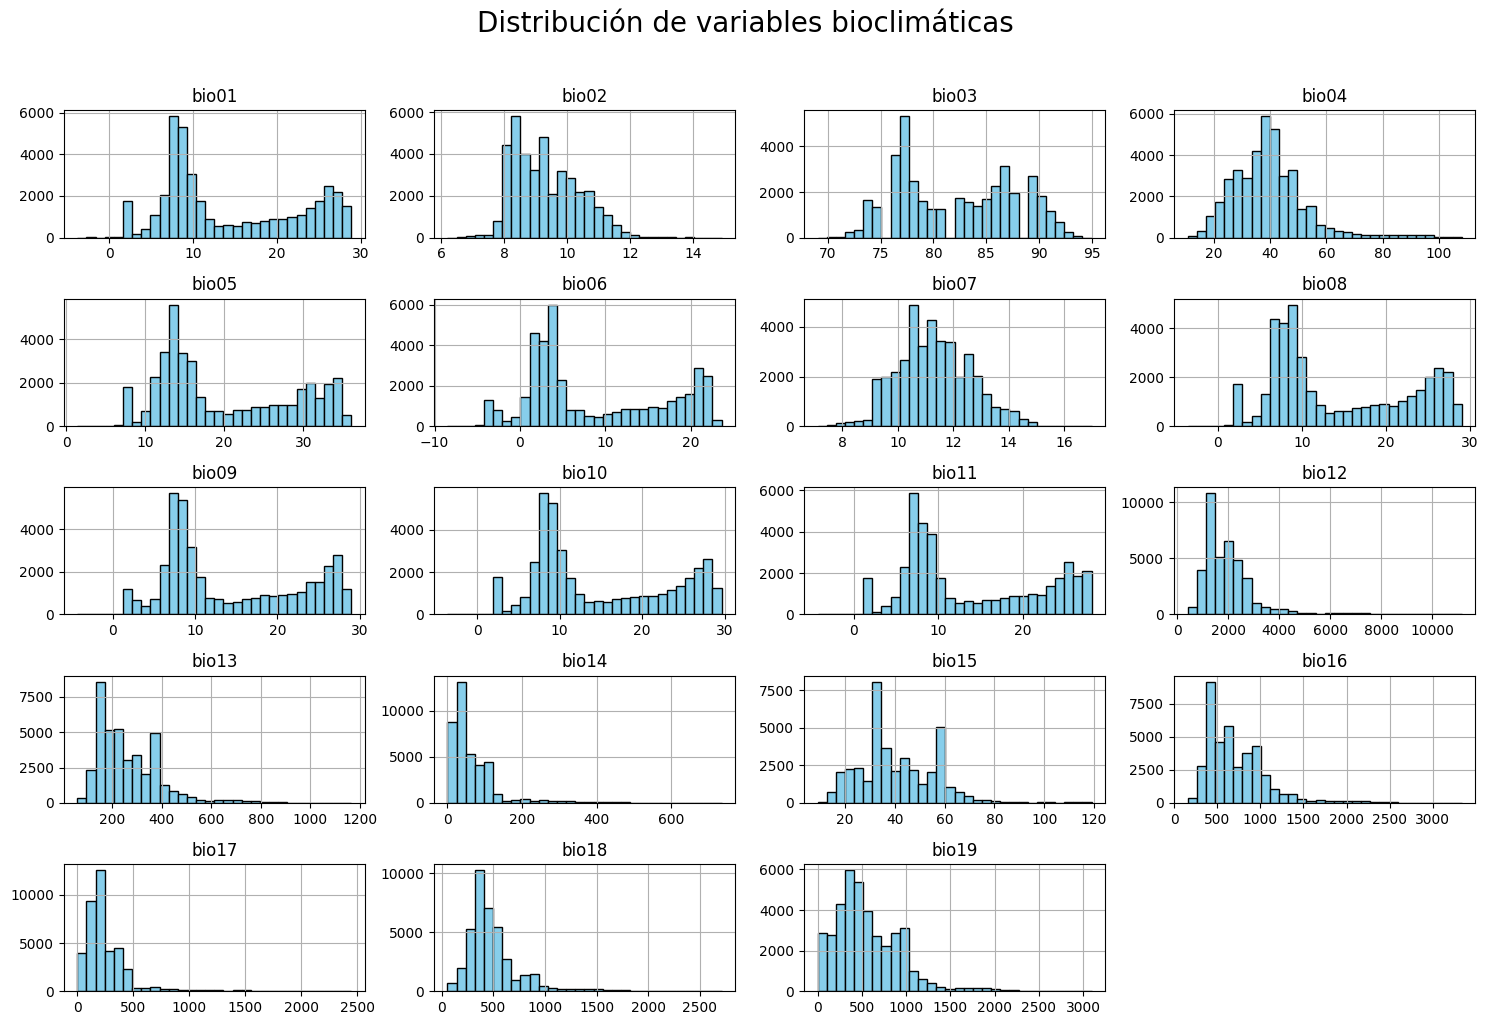

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 15))  # Cambia el tamaño del gráfico
biomodel[biomodel.columns[:19]].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de variables bioclimáticas', fontsize=20, y=1.02)  # Título general
plt.tight_layout()  # Ajusta automáticamente los subgráficos
plt.show()

## Matriz de correlación (heatmap)

In [12]:
# ---------- 2. Etiquetas descriptivas ----------
bio_labels = {
    "bio01": "Temp media anual",
    "bio02": "Rango diurno medio",
    "bio03": "Isotermalidad",
    "bio04": "Rango temp anual",
    "bio05": "Temp máx mes cálido",
    "bio06": "Temp mín mes frío",
    "bio07": "Amplitud térmica",
    "bio08": "Temp media trim húmedo",
    "bio09": "Temp media trim seco",
    "bio10": "Temp media trim cálido",
    "bio11": "Temp media trim frío",
    "bio12": "Precipitación anual",
    "bio13": "Prec. mes más húmedo",
    "bio14": "Prec. mes más seco",
    "bio15": "Estacionalidad prec.",
    "bio16": "Prec. trim más húmedo",
    "bio17": "Prec. trim más seco",
    "bio18": "Prec. trim más cálido",
    "bio19": "Prec. trim más frío"
}


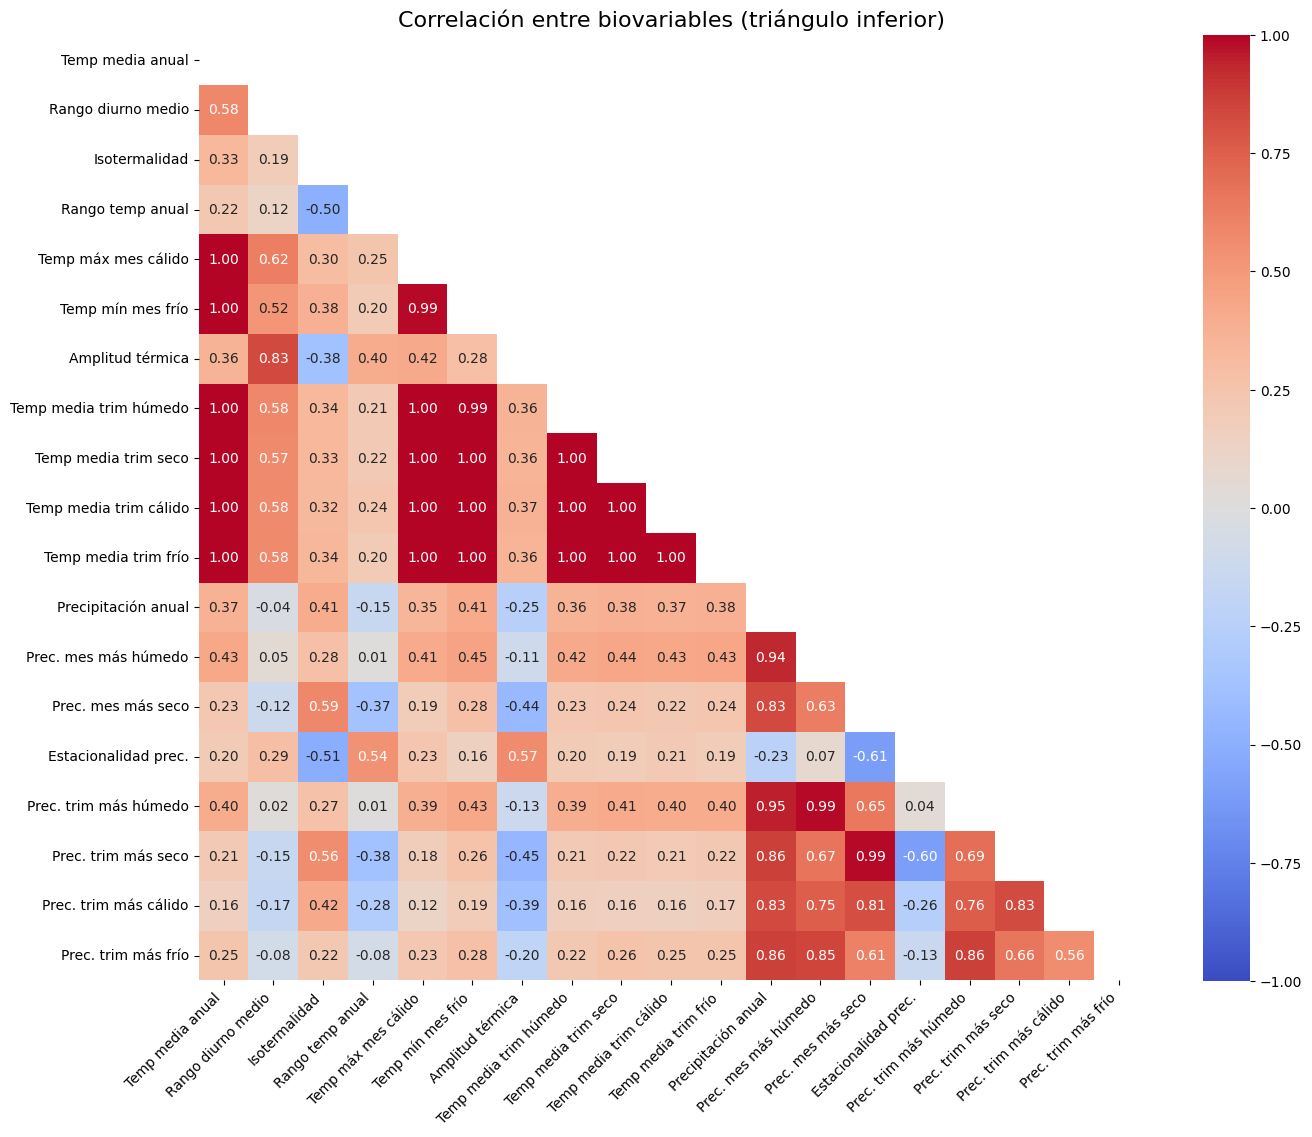

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------- 3. Matriz de correlación ----------
corr = biomodel[biomodel.columns[:19]].corr()

# ---------- 4. Heatmap triangular inferior ----------
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(corr.rename(index=bio_labels, columns=bio_labels), 
            mask=mask, cmap='coolwarm', vmin=-1, vmax=1, 
            annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.9})
plt.title("Correlación entre biovariables (triángulo inferior)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

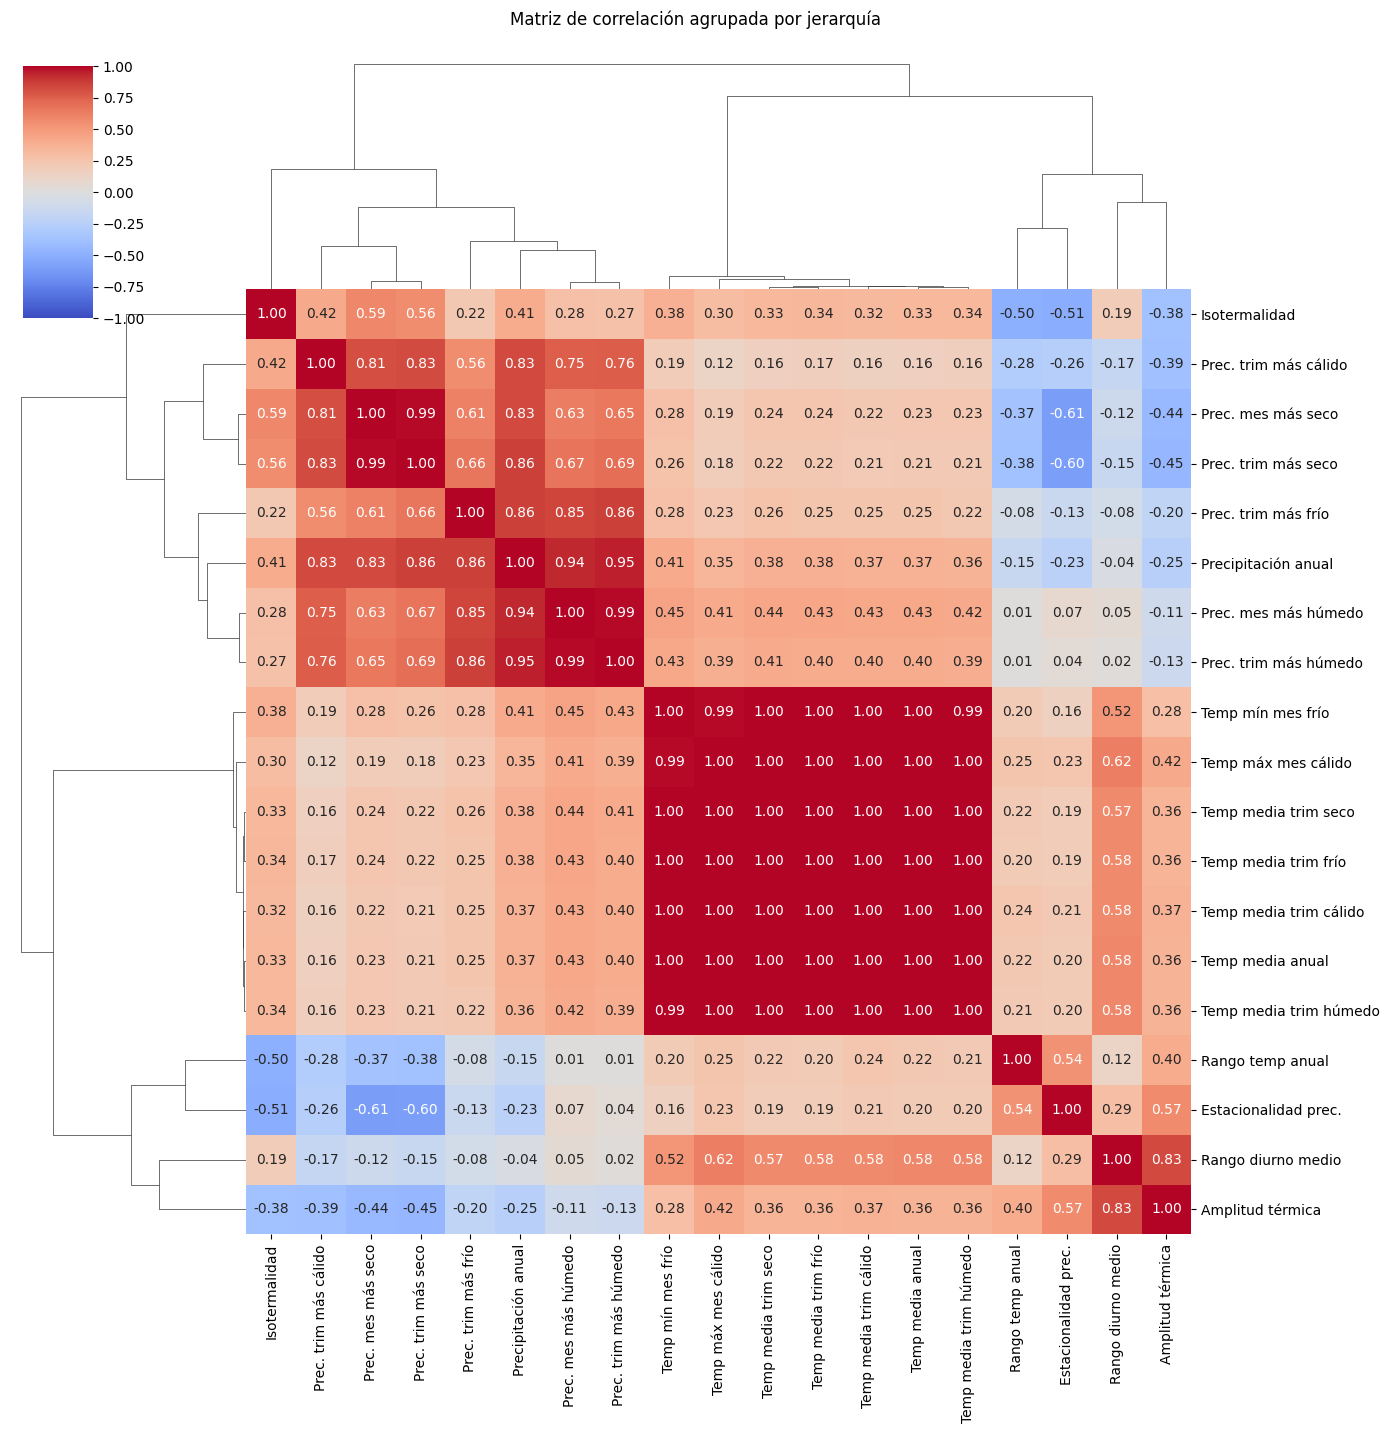

In [14]:
# ---------- 5. Clustermap (opcional) ----------
sns.clustermap(corr, cmap='coolwarm', vmin=-1, vmax=1,
               figsize=(14, 14), annot=True, fmt=".2f",
               row_cluster=True, col_cluster=True,
               xticklabels=[bio_labels[c] for c in corr.columns],
               yticklabels=[bio_labels[r] for r in corr.index])
plt.suptitle("Matriz de correlación agrupada por jerarquía", y=1.02)
plt.show()


In [15]:
# ---------- 6. Detección de colinealidad alta ----------
# Filtrar pares de variables con |r| > 0.8 y no repetidos
corr_unstacked = corr.abs().unstack().reset_index()
corr_unstacked.columns = ['var1', 'var2', 'correlation']
corr_filtered = corr_unstacked[(corr_unstacked['var1'] != corr_unstacked['var2']) &
                               (corr_unstacked['correlation'] > 0.8)]
# Eliminar duplicados tipo (bio01, bio02) y (bio02, bio01)
corr_filtered['pair'] = corr_filtered.apply(lambda row: tuple(sorted([row['var1'], row['var2']])), axis=1)
corr_filtered = corr_filtered.drop_duplicates('pair').drop(columns='pair')
print("📌 Pares de variables altamente correlacionadas (|r| > 0.8):")
print(corr_filtered.sort_values(by='correlation', ascending=False))


📌 Pares de variables altamente correlacionadas (|r| > 0.8):
      var1   var2  correlation
9    bio01  bio10     0.999783
10   bio01  bio11     0.999712
8    bio01  bio09     0.999335
7    bio01  bio08     0.999249
161  bio09  bio10     0.999236
181  bio10  bio11     0.999154
162  bio09  bio11     0.999119
143  bio08  bio11     0.999104
142  bio08  bio10     0.998903
85   bio05  bio10     0.997936
141  bio08  bio09     0.997726
4    bio01  bio05     0.997533
84   bio05  bio09     0.997229
86   bio05  bio11     0.996623
103  bio06  bio09     0.996580
83   bio05  bio08     0.996187
105  bio06  bio11     0.996167
5    bio01  bio06     0.995984
104  bio06  bio10     0.995530
102  bio06  bio08     0.994757
263  bio14  bio17     0.992171
243  bio13  bio16     0.991545
81   bio05  bio06     0.989060
224  bio12  bio16     0.949884
221  bio12  bio13     0.935286
225  bio12  bio17     0.863878
303  bio16  bio19     0.861953
227  bio12  bio19     0.860971
246  bio13  bio19     0.847443
222  bio12

C:\Users\danie\AppData\Local\Temp\ipykernel_50148\1206233821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_filtered['pair'] = corr_filtered.apply(lambda row: tuple(sorted([row['var1'], row['var2']])), axis=1)


In [16]:
corr_filtered

,var1,var2,correlation
4,bio01,bio05,0.997533
5,bio01,bio06,0.995984
7,bio01,bio08,0.999249
8,bio01,bio09,0.999335
9,bio01,bio10,0.999783
10,bio01,bio11,0.999712
25,bio02,bio07,0.832772
81,bio05,bio06,0.989060
83,bio05,bio08,0.996187
84,bio05,bio09,0.997229


In [17]:
corr_filtered['var1'].unique()

array(['bio01', 'bio02', 'bio05', 'bio06', 'bio08', 'bio09', 'bio10',
       'bio12', 'bio13', 'bio14', 'bio16', 'bio17'], dtype=object)

Otro criterio importante es qué tanta variabilidad presentan las variables. Mayor variabilidad puede ser mejor para el modelo, más capacidad de explicar la variación de los puntos.

In [18]:
var = biomodel[biomodel.columns[:19]].describe()
#var = var.loc[['std','mean']]
var

,bio01,bio02,bio03,bio04,bio05,bio06,bio07,bio08,bio09,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
count,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000,39538.000000
mean,14.363276,9.312431,82.115282,39.563574,20.058179,8.750559,11.307621,14.216814,14.296998,14.776354,13.797150,1991.502049,265.801027,67.201325,40.737822,716.180535,254.348551,494.097248,565.176413
std,8.155637,1.033146,5.530255,13.032504,8.502325,8.039319,1.307622,8.121754,8.190857,8.207175,8.130387,1078.085243,130.026116,70.015008,15.602537,359.418450,221.223960,265.653747,379.112053
min,-3.800000,6.200000,69.000000,10.700000,1.400000,-8.500000,7.100000,-3.600000,-4.300000,-3.600000,-4.300000,414.000000,60.000000,0.000000,9.000000,156.000000,0.000000,55.000000,0.000000
25%,7.700000,8.400000,77.000000,31.300000,13.500000,2.600000,10.400000,7.600000,7.700000,8.100000,7.200000,1325.000000,165.000000,26.000000,31.000000,441.000000,130.000000,335.250000,307.000000
50%,10.400000,9.200000,82.000000,38.500000,15.900000,4.500000,11.100000,10.400000,10.300000,10.800000,9.900000,1742.000000,232.000000,46.000000,38.000000,619.000000,195.000000,424.000000,471.000000
75%,23.000000,10.000000,87.000000,45.700000,28.975000,17.200000,12.200000,22.700000,22.900000,23.400000,22.400000,2279.000000,350.000000,86.000000,54.000000,924.000000,316.000000,560.000000,801.000000
max,28.900000,14.900000,95.000000,108.100000,36.100000,23.600000,17.000000,29.000000,29.000000,29.600000,28.100000,11151.000000,1166.000000,735.000000,119.000000,3337.000000,2446.000000,2710.000000,3096.000000


In [19]:
e = (var.loc['std'] / var.loc['mean']) * 100
e

bio01     56.781179
bio02     11.094267
bio03      6.734745
bio04     32.940663
bio05     42.388318
bio06     91.872068
bio07     11.564074
bio08     57.127803
bio09     57.290746
bio10     55.542626
bio11     58.928017
bio12     54.134277
bio13     48.918590
bio14    104.186945
bio15     38.299881
bio16     50.185454
bio17     86.976694
bio18     53.765478
bio19     67.078534
dtype: float64

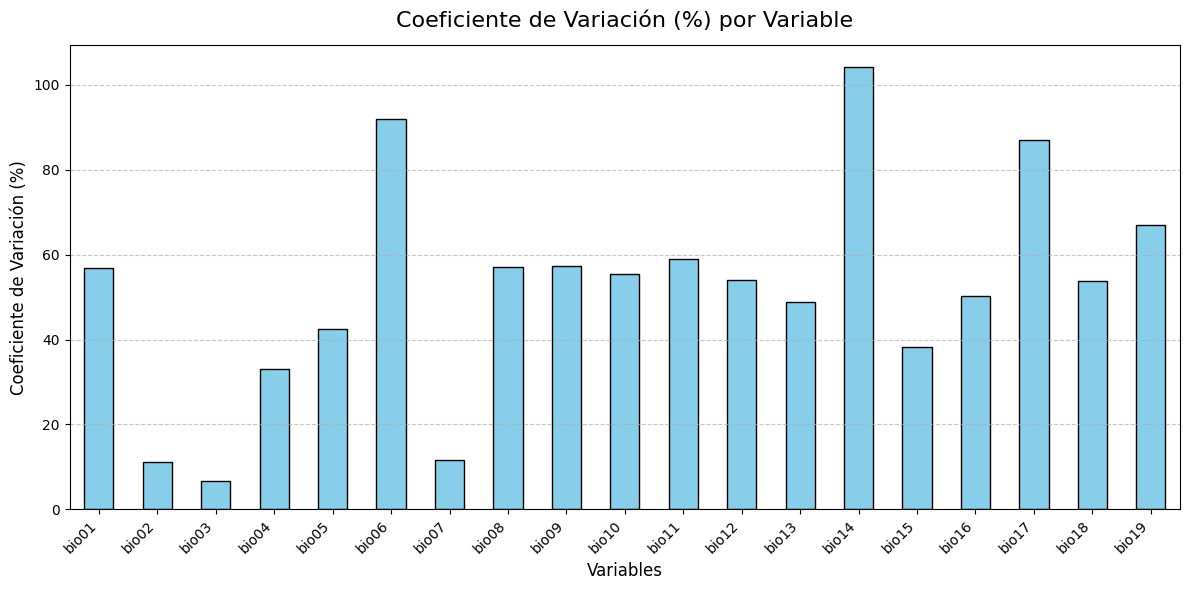

In [20]:
import matplotlib.pyplot as plt

# Graficar e como un gráfico de barras
e.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Coeficiente de Variación (%) por Variable', fontsize=16, y=1.02)
plt.xlabel('Variables', fontsize=12, y=1.02)
plt.ylabel('Coeficiente de Variación (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Modelo Regresión Logistica

### Selección de las variables

Proponemos las siguientes variables a partir de la importancia y de los análisis de correlación y redundancia

| Variable | Significado                        | Justificación                   |
| -------- | ---------------------------------- | ------------------------------- |
| `bio01`  | Temperatura media anual            | General, robusta                |
| `bio03`  | Isotermalidad                      | Captura variabilidad térmica    |
| `bio04`  | Rango de temperatura anual         | Complementa `bio01`             |
| `bio07`  | Amplitud térmica anual             | Importante en zonas montañosas  |
| `bio12`  | Precipitación anual                | Indicador hídrico clave         |
| `bio15`  | Estacionalidad de la precipitación | Representa variabilidad hídrica |


In [60]:
#subset = ["bio01", "bio03", "bio04", "bio07", "bio12", "bio15"]
# Prueba con menos variables
subset = ["bio10"]

In [61]:
# 
# Seleccionar las columnas del subset y la columna 'y'
biomodel_subset = biomodel[subset + ['y']].copy()

# Mostrar información del nuevo DataFrame
print(biomodel_subset.info())
biomodel_subset.columns

<class 'pandas.core.frame.DataFrame'>
Index: 39538 entries, 3 to 41695
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bio10   39538 non-null  float64
 1   y       39538 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 926.7 KB
None


Index(['bio10', 'y'], dtype='object')

In [62]:
import statsmodels.api as sm

# Agregar constante
X = sm.add_constant(biomodel_subset[subset])  # añade la constante (intercepto)
y = biomodel_subset['y']

# Ajuste del modelo
modelo = sm.Logit(y, X).fit()

print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.205130
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                39538
Model:                          Logit   Df Residuals:                    39536
Method:                           MLE   Df Model:                            1
Date:               mar, 27 may. 2025   Pseudo R-squ.:                  0.7040
Time:                        15:44:39   Log-Likelihood:                -8110.4
converged:                       True   LL-Null:                       -27398.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8591      0.089     88.000      0.000       7.684       8.034
bio10         -0.6355      0.

Optimization terminated successfully.
         Current function value: 0.205130
         Iterations 9

📊 Resumen del modelo:
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.704     
Date:               2025-05-27 15:44 AIC:              16224.8989
No. Observations:   39538            BIC:              16242.0690
Df Model:           1                Log-Likelihood:   -8110.4   
Df Residuals:       39536            LL-Null:          -27398.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     9.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -1.5305     0.0391   -39.1538   0.0000   -1.6072   -1.4539
bio10    -5.2152     0.0668   -78.0

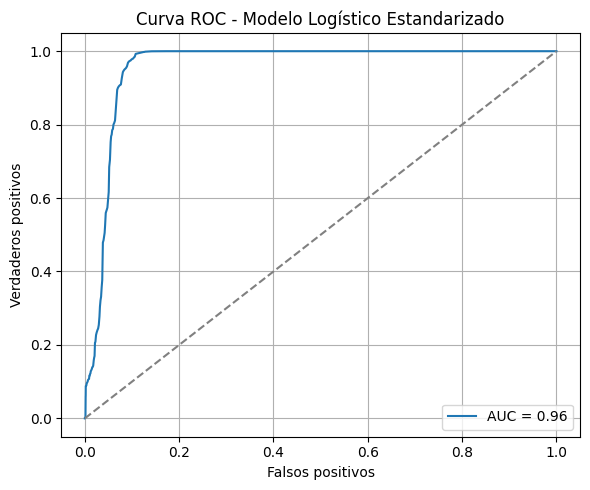

In [63]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Variables predictoras y respuesta
X_orig = biomodel_subset[subset]
y = biomodel_subset['y']

# 2. Estandarizar las variables
scaler = StandardScaler()
X_scaled_np = scaler.fit_transform(X_orig)

# 3. Convertir a DataFrame y conservar nombres de columnas
X_scaled = pd.DataFrame(X_scaled_np, columns=subset, index=X_orig.index)

# 4. Agregar constante para el intercepto
X_scaled = sm.add_constant(X_scaled)

# 5. Ajustar modelo logístico
modelo = sm.Logit(y, X_scaled).fit()

# 6. Resumen del modelo
print("\n📊 Resumen del modelo:")
print(modelo.summary2())

# 7. Odds Ratios (OR)
resumen = modelo.summary2().tables[1]
resumen['OR'] = np.exp(resumen['Coef.'])
print("\n🧠 Coeficientes estandarizados y Odds Ratios:")
print(resumen[['Coef.', 'Std.Err.', 'P>|z|', 'OR']].round(4))

# 8. Pseudo R² de McFadden
print(f"\n📈 McFadden R²: {modelo.prsquared:.4f}")

# 9. Curva ROC
y_prob = modelo.predict(X_scaled)
fpr, tpr, _ = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC - Modelo Logístico Estandarizado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Modelo con Sklearn: Validación cruzada

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Crear el pipeline: primero escala, luego ajusta modelo
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, class_weight='balanced')
)

# Validación cruzada usando AUC como métrica
scores = cross_val_score(
    pipeline,
    biomodel_subset[subset],   # X
    biomodel_subset['y'],      # y
    cv=5,
    scoring='roc_auc'
)

# Mostrar resultados
print("AUC promedio (CV=5):", scores.mean())
print("AUCs por fold:", scores)

AUC promedio (CV=5): 0.9681127969125735
AUCs por fold: [0.97168686 0.96176638 0.97520642 0.97452732 0.957377  ]


### Modelo con Sklearn: Curva ROC - Entrenamiento y testeo

Matriz de confusión:
[[5276  540]
 [  76 5970]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.91      0.94      5816
           1       0.92      0.99      0.95      6046

    accuracy                           0.95     11862
   macro avg       0.95      0.95      0.95     11862
weighted avg       0.95      0.95      0.95     11862



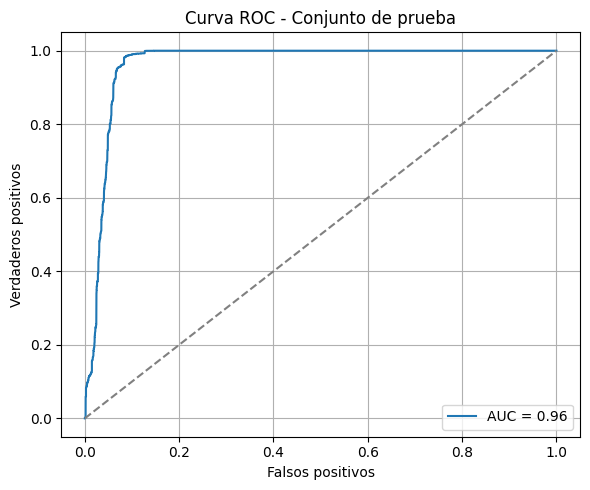

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    biomodel_subset[subset],
    biomodel_subset['y'],
    test_size=0.3,
    random_state=42,
    stratify=biomodel_subset['y']
)

# Pipeline con estandarización y modelo logístico balanceado
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, class_weight='balanced')
)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Obtener probabilidades en test
y_prob = pipeline.predict_proba(X_test)[:, 1]  # probabilidad de clase 1
y_pred = pipeline.predict(X_test)  # clasificación binaria

# Matriz de confusión con conjunto de prueba
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC - Conjunto de prueba')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Comparando todas las variables dentro del modelo

In [56]:
All = ['bio01', 'bio02', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08', 'bio09', 
 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19']

In [57]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import numpy as np

# 1. Variables predictoras
X = biomodel[All]
y = biomodel['y']

# 2. Estandarizar
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=subset, index=X.index)

# 3. Agregar constante
X_scaled = sm.add_constant(X_scaled)

# 4. Ajustar modelo
modelo = sm.Logit(y, X_scaled).fit()

# 5. Obtener coeficientes y Odds Ratios
resumen = modelo.summary2().tables[1]
resumen['OR'] = np.exp(resumen['Coef.'])

# 6. Ordenar por magnitud del coeficiente
print("\nVariables más influyentes (en escala estandarizada):")
resumen[['Coef.', 'P>|z|', 'OR']].sort_values(by='Coef.', key=np.abs, ascending=False)


         Current function value: 0.149876
         Iterations: 35

Variables más influyentes (en escala estandarizada):


c:\Users\danie\miniconda3\envs\GeoSpatial\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Coef.,P>|z|,OR
bio10,61.650345,2.018203e-51,5.948459e+26
bio11,-54.369023,3.005112e-30,2.442493e-24
bio09,17.346791,1.235563e-43,3.416768e+07
bio06,-10.219259,9.999995e-01,3.646130e-05
bio05,-9.462982,9.999996e-01,7.767460e-05
bio16,-7.385232,1.768394e-35,6.203468e-04
bio08,-6.736466,8.515651e-10,1.186834e-03
bio18,3.532583,1.437021e-103,3.421223e+01
bio01,-2.746071,5.257033e-01,6.417950e-02
const,-2.352080,2.253733e-220,9.517099e-02
